In [26]:
import pandas_datareader
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import yfinance as yf
warnings.filterwarnings('ignore')
yf.pdr_override()

In [4]:
pandas_datareader.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [5]:
start = '1926-01-01'

In [9]:
ff = pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq='M', start=start).read()

In [7]:
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.56 -2.43  0.22
 1926-08    2.64 -1.17  3.82  0.25
 1926-09    0.36 -1.40  0.13  0.23
 1926-10   -3.24 -0.09  0.70  0.32
 1926-11    2.53 -0.10 -0.51  0.31
 ...         ...   ...   ...   ...
 2023-10   -3.19 -3.87  0.19  0.47
 2023-11    8.84 -0.02  1.64  0.44
 2023-12    4.87  6.34  4.93  0.43
 2024-01    0.71 -5.09 -2.38  0.47
 2024-02    5.06 -0.24 -3.48  0.42
 
 [1172 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.04  -4.54  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 ...      ...    ...    ...   ...
 2019   28.28  -6.14 -10.46  2.15
 2020   23.66  13.18 -46.67  0.45
 2021   23.56  -3.89  25.49  0.04
 2022  -21.60  -6.95  25.81  1.43
 2023   21.70  -3.23 -13.58  4.95
 
 [97 rows x 4 columns],
 'DESCR': 'F-F Research Data Factors\n-----

In [10]:
ff_df = ff[0]

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

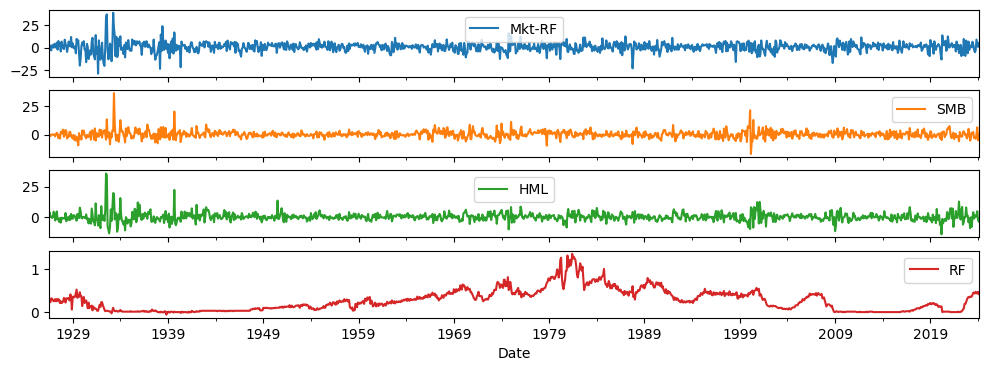

In [12]:
ff_df.plot(subplots=True, figsize=(12,4))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

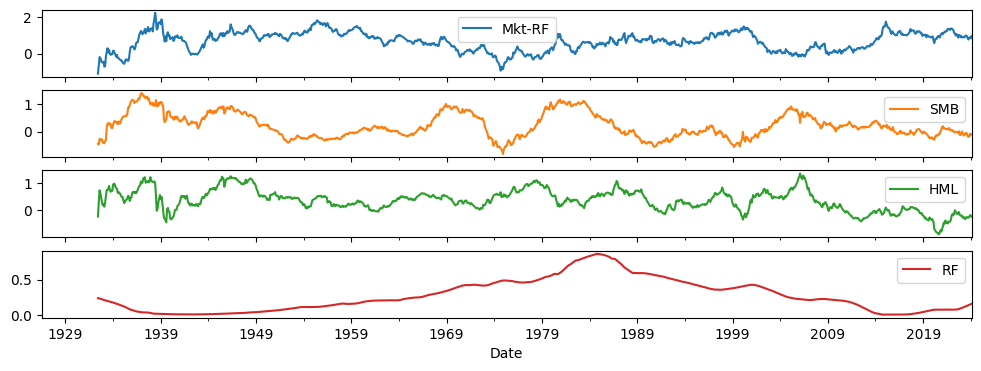

In [13]:
ff_df.rolling(72).mean().plot(subplots=True, figsize=(12,4))

In [14]:
ff_mom_df = pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq = 'M', start=start).read()[0]

array([<Axes: xlabel='Date'>], dtype=object)

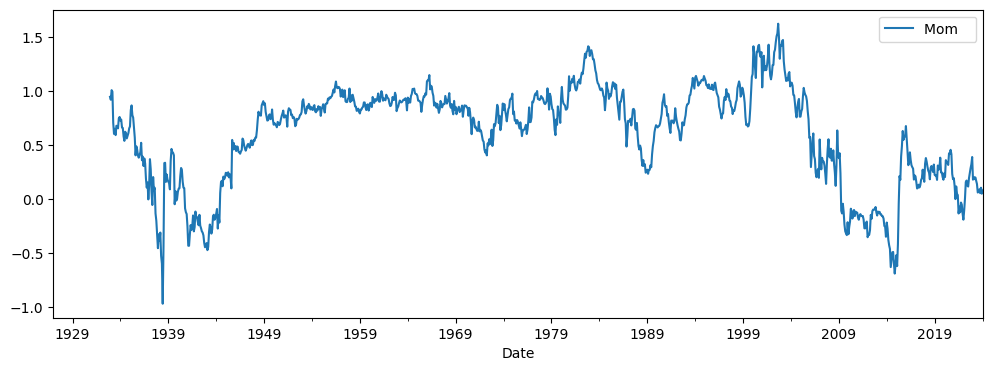

In [15]:
ff_mom_df.rolling(72).mean().plot(subplots=True, figsize=(12,4))

In [16]:
ff_df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31
...,...,...,...,...
2023-10,-3.19,-3.87,0.19,0.47
2023-11,8.84,-0.02,1.64,0.44
2023-12,4.87,6.34,4.93,0.43


In [17]:
ff_mom_df

,Mom
Date,
1927-01,0.36
1927-02,-2.14
1927-03,3.61
1927-04,4.30
1927-05,3.00
...,...
2023-10,1.73
2023-11,2.75
2023-12,-5.51


In [19]:
ffac_merged_df = pd.merge(ff_df, ff_mom_df, on='Date', how='inner', sort=True, copy=True, indicator=False, validate='one_to_one')

In [20]:
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36
1927-02,4.18,0.04,2.94,0.26,-2.14
1927-03,0.13,-1.65,-2.61,0.30,3.61
1927-04,0.46,0.30,0.81,0.25,4.30
1927-05,5.44,1.53,4.73,0.30,3.00
...,...,...,...,...,...
2023-10,-3.19,-3.87,0.19,0.47,1.73
2023-11,8.84,-0.02,1.64,0.44,2.75
2023-12,4.87,6.34,4.93,0.43,-5.51


In [28]:
AAPL_data = pandas_datareader.data.get_data_yahoo('AAPL', start=start)['Adj Close'].resample('M').ffill().pct_change()

[*********************100%%**********************]  1 of 1 completed


In [29]:
AAPL_data

Date
1980-12-31         NaN
1981-01-31   -0.172163
1981-02-28   -0.061943
1981-03-31   -0.075475
1981-04-30    0.158162
                ...   
2023-12-31    0.013583
2024-01-31   -0.042227
2024-02-29   -0.018543
2024-03-31   -0.051286
2024-04-30    0.029566
Freq: ME, Name: Adj Close, Length: 521, dtype: float64

In [30]:
AAPL_df = AAPL_data.to_frame()
AAPL_df

,Adj Close
Date,
1980-12-31,NaN
1981-01-31,-0.172163
1981-02-28,-0.061943
1981-03-31,-0.075475
1981-04-30,0.158162
...,...
2023-12-31,0.013583
2024-01-31,-0.042227
2024-02-29,-0.018543


In [31]:
AAPL_df.index.dtype

dtype('<M8[ns]')

In [32]:
ffac_merged_df.index.dtype

period[M]

In [33]:
AAPL_df['str_date'] = AAPL_df.index.astype(str)
AAPL_df['dt_date'] = pd.to_datetime(AAPL_df['str_date']).dt.strftime('%Y-%m')

In [34]:
AAPL_df.dt_date.dtype

dtype('O')

In [42]:
ffac_merged_df['str_date'] = ffac_merged_df.index.astype(str)
ffac_merged_df['dt_date'] = pd.to_datetime(ffac_merged_df['str_date']).dt.strftime('%Y-%m')
ffac_merged_df.dt_date.dtype

dtype('O')

In [43]:
AAPL_ffac_merge_df = pd.merge(AAPL_df, ffac_merged_df, how='inner', on='dt_date', sort=True, copy=True, indicator=False, validate='one_to_one')

In [45]:
AAPL_ffac_merge_df

,Adj Close,str_date_x,dt_date,Mkt-RF,SMB,HML,RF,Mom,str_date_y
0,NaN,1980-12-31,1980-12,-4.52,-0.26,2.79,1.31,-6.68,1980-12
1,-0.172163,1981-01-31,1981-01,-5.04,2.92,6.72,1.04,-7.95,1981-01
2,-0.061943,1981-02-28,1981-02,0.57,-0.34,1.02,1.07,-1.35,1981-02
3,-0.075475,1981-03-31,1981-03,3.56,3.54,0.64,1.21,0.74,1981-03
4,0.158162,1981-04-30,1981-04,-2.11,4.40,2.28,1.08,-0.91,1981-04
...,...,...,...,...,...,...,...,...,...
514,-0.002570,2023-10-31,2023-10,-3.19,-3.87,0.19,0.47,1.73,2023-10
515,0.113780,2023-11-30,2023-11,8.84,-0.02,1.64,0.44,2.75,2023-11
516,0.013583,2023-12-31,2023-12,4.87,6.34,4.93,0.43,-5.51,2023-12
517,-0.042227,2024-01-31,2024-01,0.71,-5.09,-2.38,0.47,5.18,2024-01


In [46]:
AAPL_ffac_merge_df.drop(columns=['str_date_x', 'str_date_y'], inplace=True)

In [47]:
AAPL_ffac_merge_df.rename(columns={"Adj Close":"AAPL"}, inplace=True)

In [48]:
AAPL_ffac_merge_df

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom
0,NaN,1980-12,-4.52,-0.26,2.79,1.31,-6.68
1,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95
2,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35
3,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74
4,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91
...,...,...,...,...,...,...,...
514,-0.002570,2023-10,-3.19,-3.87,0.19,0.47,1.73
515,0.113780,2023-11,8.84,-0.02,1.64,0.44,2.75
516,0.013583,2023-12,4.87,6.34,4.93,0.43,-5.51
517,-0.042227,2024-01,0.71,-5.09,-2.38,0.47,5.18


In [49]:
AAPL_ffac_merge_df['AAPL_RF'] = AAPL_ffac_merge_df['AAPL']*100 - AAPL_ffac_merge_df['RF']

In [50]:
AAPL_ffac_merge_df

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom,AAPL_RF
0,NaN,1980-12,-4.52,-0.26,2.79,1.31,-6.68,NaN
1,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,-18.256323
2,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,-7.264301
3,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,-8.757503
4,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91,14.736191
...,...,...,...,...,...,...,...,...
514,-0.002570,2023-10,-3.19,-3.87,0.19,0.47,1.73,-0.726993
515,0.113780,2023-11,8.84,-0.02,1.64,0.44,2.75,10.938016
516,0.013583,2023-12,4.87,6.34,4.93,0.43,-5.51,0.928257
517,-0.042227,2024-01,0.71,-5.09,-2.38,0.47,5.18,-4.692721


In [52]:
AAPL_ffac_merge_df.dropna(axis=0, inplace=True)

In [53]:
AAPL_ffac_merge_df

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom,AAPL_RF
1,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,-18.256323
2,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,-7.264301
3,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,-8.757503
4,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91,14.736191
5,0.167398,1981-05,0.11,2.00,-0.42,1.15,3.70,15.589844
...,...,...,...,...,...,...,...,...
514,-0.002570,2023-10,-3.19,-3.87,0.19,0.47,1.73,-0.726993
515,0.113780,2023-11,8.84,-0.02,1.64,0.44,2.75,10.938016
516,0.013583,2023-12,4.87,6.34,4.93,0.43,-5.51,0.928257
517,-0.042227,2024-01,0.71,-5.09,-2.38,0.47,5.18,-4.692721


In [55]:
from statsmodels.api import OLS

In [57]:
AAPL_ffac_merge_df.rename(columns={'Mom   ': 'MOM'}, inplace=True)

In [59]:
results = OLS(AAPL_ffac_merge_df['AAPL_RF'], AAPL_ffac_merge_df[['Mkt-RF', 'SMB', 'HML', 'MOM']], missing='drop').fit()

In [60]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                AAPL_RF   R-squared (uncentered):                   0.293
Model:                            OLS   Adj. R-squared (uncentered):              0.287
Method:                 Least Squares   F-statistic:                              53.20
Date:                Sun, 14 Apr 2024   Prob (F-statistic):                    1.65e-37
Time:                        13:41:44   Log-Likelihood:                         -1970.8
No. Observations:                 518   AIC:                                      3950.
Df Residuals:                     514   BIC:                                      3967.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.2652      0.112     11.282      0.000       1.045       1.486
SMB            0.2288      0.167      1.370      0.171      -0.099       0.557
HML           -0.8194      0.161     -5.096      0.000      -1.135      -0.504
MOM           -0.0519      0.113     -0.458      0.647      -0.275       0.171
==============================================================================
Omnibus:                       16.430   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.841
Skew:                          -0.044   Prob(JB):                     1.65e-08
Kurtosis:                       4.286   Cond. No.                         1.85
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
import statsmodels.tools 
AAPL_ffac_merge_df_c = statsmodels.tools.add_constant(AAPL_ffac_merge_df, prepend=True)

In [62]:
AAPL_ffac_merge_df_c

,const,AAPL,dt_date,Mkt-RF,SMB,HML,RF,MOM,AAPL_RF
1,1.0,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,-18.256323
2,1.0,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,-7.264301
3,1.0,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,-8.757503
4,1.0,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91,14.736191
5,1.0,0.167398,1981-05,0.11,2.00,-0.42,1.15,3.70,15.589844
...,...,...,...,...,...,...,...,...,...
514,1.0,-0.002570,2023-10,-3.19,-3.87,0.19,0.47,1.73,-0.726993
515,1.0,0.113780,2023-11,8.84,-0.02,1.64,0.44,2.75,10.938016
516,1.0,0.013583,2023-12,4.87,6.34,4.93,0.43,-5.51,0.928257
517,1.0,-0.042227,2024-01,0.71,-5.09,-2.38,0.47,5.18,-4.692721


In [64]:
results = OLS(AAPL_ffac_merge_df_c['AAPL_RF'], AAPL_ffac_merge_df_c[['const','Mkt-RF', 'SMB', 'HML', 'MOM']], missing='drop').fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AAPL_RF   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     51.71
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           1.37e-36
Time:                        13:46:43   Log-Likelihood:                -1966.8
No. Observations:                 518   AIC:                             3944.
Df Residuals:                     513   BIC:                             3965.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3776      0.492      2.799      0.005       0.411       2.344
Mkt-RF         1.2006      0.114     10.552      0.000       0.977       1.424
SMB            0.2273      0.166      1.370      0.171      -0.099       0.553
HML           -0.8865      0.162     -5.489      0.000      -1.204      -0.569
MOM           -0.1077      0.114     -0.941      0.347      -0.333       0.117
==============================================================================
Omnibus:                       15.717   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.457
Skew:                          -0.041   Prob(JB):                     5.43e-08
Kurtosis:                       4.242   Cond. No.                         5.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""